In [7]:
library(tidyverse)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 6)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


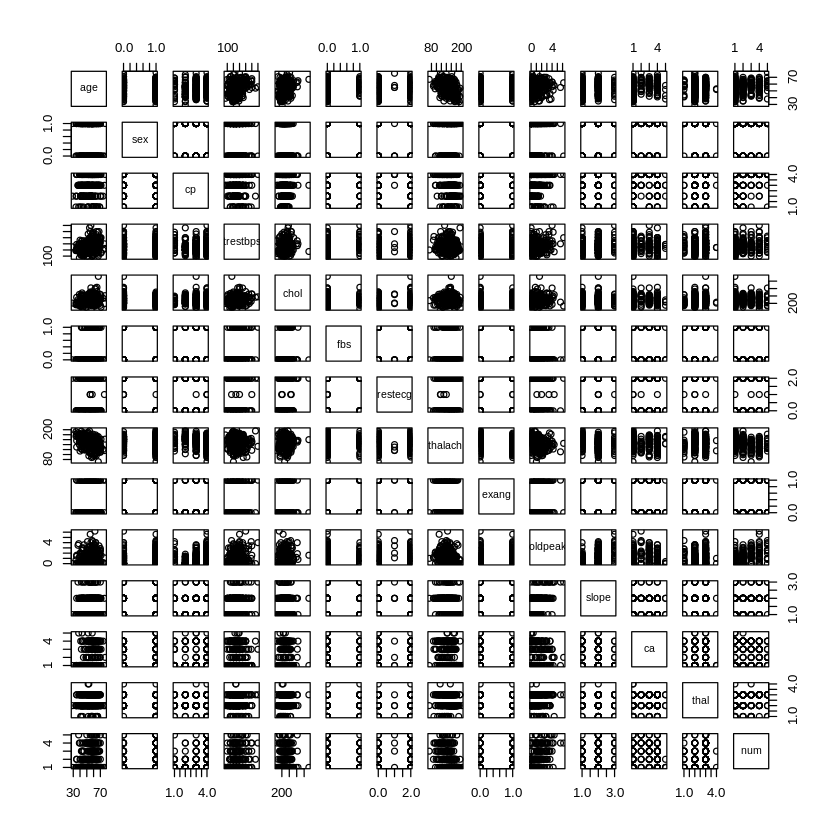

In [36]:
# Loading in the processed Cleveland heart disease dataset.

URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

cleveland_data <- read_csv(URL, col_names=FALSE)
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland_data <- cleveland_data |>
                    mutate(ca = as_factor(ca), thal = as_factor(thal), num = as_factor(num))
cleveland_data

pairs(cleveland_data)

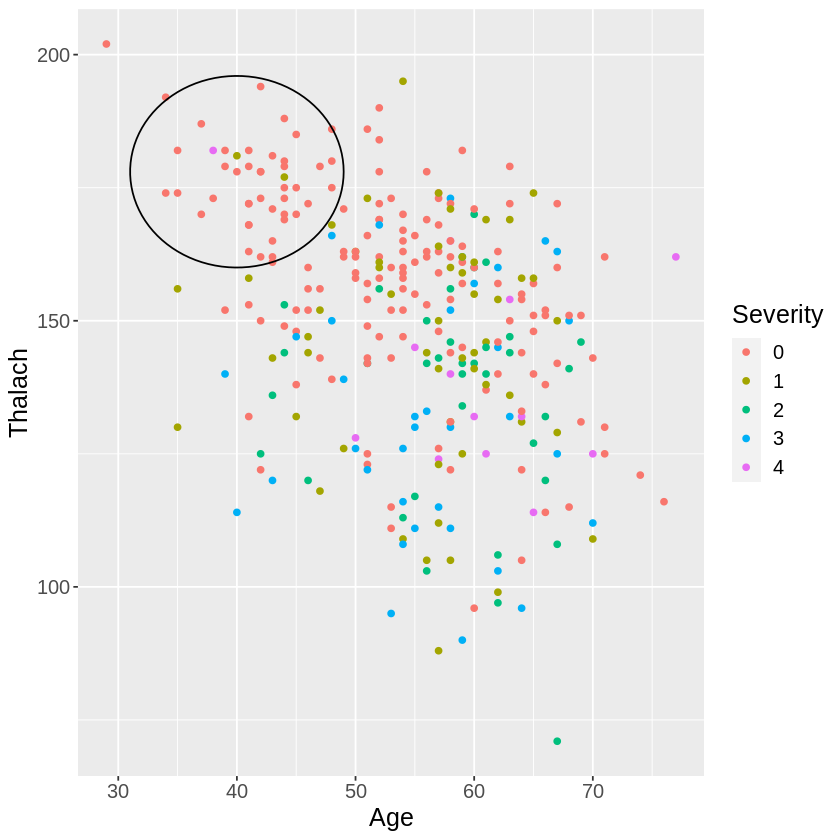

In [106]:
point <- c(40, 178)

age_vs_thalach <- cleveland_data |>
                    ggplot(aes(x = age, y = thalach, color = num)) +
                    geom_point(alpha = 1) +
                    annotate("path", 
                     x=point[1] + 9*cos(seq(0,2*pi,length.out=100)),
                     y=point[2] + 18*sin(seq(0,2*pi,length.out=100))) +
                    labs(x = "Age", y = "Thalach", color = "Severity") +
                    theme(text = element_text(size = 15))

age_vs_thalach

Hence, by plotting Age against "thalach", we can see that there is a cluster of 0 severity heart disease patients around the lower ages of 30-40, and of "thalach" between 150 and 200.

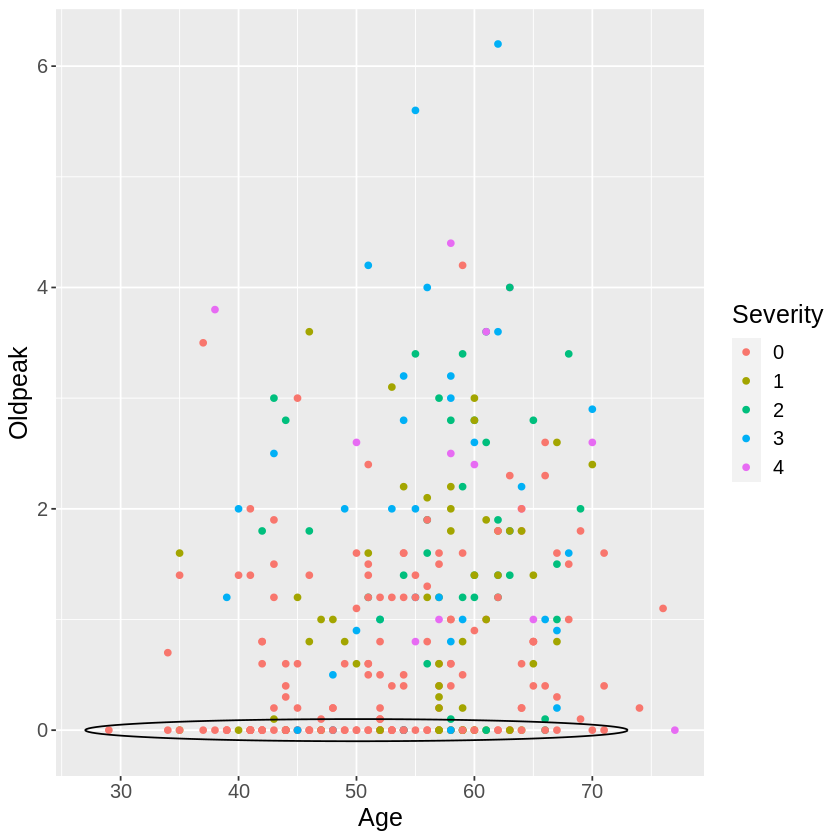

In [119]:
point <- c(50, 0)

age_vs_thalach <- cleveland_data |>
                    ggplot(aes(x = age, y = oldpeak, color = num)) +
                    geom_point() +
                    annotate("path", 
                     x=point[1] + 23*cos(seq(0,2*pi,length.out=100)),
                     y=point[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                    labs(x = "Age", y = "Oldpeak", color = "Severity") +
                    theme(text = element_text(size = 15))

age_vs_thalach

Hence, by plotting Age against "Oldpeak", we can see that there is a cluster of 0 severity heart disease patients around the "Oldpeak" value of 0, and decreasing number of 0 severity patients as oldpeak increases.